**For the analysis, I wanted to find answers to the following questions from the given dataset:**

1. How does productivity vary between the users by their assigned job type?
2. How does productivity vary given the job count?
3. What is the trend of average research time, average review time & productivity by month over the years for both users collectively?


In [1]:
# Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importing Dataset & Data cleaning

In [3]:
# Loading the dataset as a dataframe using pandas 
path = "C:/Users/Owner/Documents/Python Codes/Data Analyst Projects/review_dataset.xlsx"
df = pd.read_excel(path)
#print(df)


In [4]:
df.head()

,Avg Research Time,S Count,Avg Review Time,name,job count,productivity,Inactive Time,Research Time,Total Review Time,TimeStamp,job_type,hour,user_id
0,15.694,0,86.801,User 2,14,41,43.669,219.726,1215.223,2021-08-02,JOB2,2021-08-02 05:00:00,#10000000001
1,12.737,0,36.433,User 2,77,99,8.335,980.804,2805.353,2021-08-02,JOB2,2021-08-02 06:00:00,#10000000001
2,36.564,0,80.007,User 2,23,45,34.983,840.973,1840.183,2021-08-02,JOB2,2021-08-02 07:00:00,#10000000001
3,11.031,0,154.973,User 2,24,23,19.559,264.763,3719.359,2021-08-02,JOB2,2021-08-02 08:00:00,#10000000001
4,19.277,0,37.576,User 2,57,96,94.647,1098.799,2141.859,2021-08-02,JOB2,2021-08-02 10:00:00,#10000000001


In [6]:
# check for missing values and fill them
#df.isnull().values.any()
df.isnull().sum()

name                 0
user_id              0
TimeStamp            0
hour                 0
Inactive Time        0
job_type             0
job count            0
productivity         0
S Count              0
Research Time        0
Avg Research Time    0
Total Review Time    0
Avg Review Time      0
dtype: int64

In [7]:
# checking the attributes of each column in the datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               1929 non-null   object        
 1   user_id            1929 non-null   object        
 2   TimeStamp          1929 non-null   datetime64[ns]
 3   hour               1929 non-null   datetime64[ns]
 4   Inactive Time      1929 non-null   float64       
 5   job_type           1929 non-null   object        
 6   job count          1929 non-null   int64         
 7   productivity       1929 non-null   int64         
 8   S Count            1929 non-null   int64         
 9   Research Time      1929 non-null   float64       
 10  Avg Research Time  1929 non-null   float64       
 11  Total Review Time  1929 non-null   float64       
 12  Avg Review Time    1929 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory us

In [9]:
# Checking the number of observations and coulmns/features of the dataset

count_rows = df.shape[0]
count_columns = df.shape[1]
print('There are {} observations and {} attributes'.format(count_rows, count_columns))

There are 1929 observations and 13 attributes


In [10]:
# Check any duplicated data set and column formats

print(sum(df.duplicated(keep="first")),"transaction rows affected") #Mark duplicates as True except for the first occurrence.


0 transaction rows affected


In [12]:
# renaming the variable names in lower keys
df.rename(columns={'TimeStamp': 'time_stamp','Inactive Time':'inactive_time','job count':'job_count',\
                   'S Count':'s_count','Research Time':'total_research_time','Avg Research Time':'avg_research_time',\
                   'Total Review Time':'total_review_time','Avg Review Time':'avg_review_time'},inplace=True)

# arranging the columns in the dataframe
df = df[['name', 'user_id', 'time_stamp', 'hour', 'inactive_time','job_type', 'job_count',\
         'productivity', 's_count', 'total_research_time', 'avg_research_time', 'total_review_time', 'avg_review_time']]
df.head()

,name,user_id,time_stamp,hour,inactive_time,job_type,job_count,productivity,s_count,total_research_time,avg_research_time,total_review_time,avg_review_time
0,User 2,#10000000001,2021-08-02,2021-08-02 05:00:00,43.669,JOB2,14,41,0,219.726,15.694,1215.223,86.801
1,User 2,#10000000001,2021-08-02,2021-08-02 06:00:00,8.335,JOB2,77,99,0,980.804,12.737,2805.353,36.433
2,User 2,#10000000001,2021-08-02,2021-08-02 07:00:00,34.983,JOB2,23,45,0,840.973,36.564,1840.183,80.007
3,User 2,#10000000001,2021-08-02,2021-08-02 08:00:00,19.559,JOB2,24,23,0,264.763,11.031,3719.359,154.973
4,User 2,#10000000001,2021-08-02,2021-08-02 10:00:00,94.647,JOB2,57,96,0,1098.799,19.277,2141.859,37.576


### Explanatory Data Analysis

In [16]:
# To check how many unique categories are there

print ('\nQ: How many different users do we have?')
print (df['name'].unique())
print ('\nQ:How many types of job has been assigned to the users?')
print (df['job_type'].unique())
print ('\nQ:How many unique s_count mentioned in the dataframe?')
print (df['s_count'].unique())



Q: How many different users do we have?
['User 2' 'User 1']

Q:How many types of job has been assigned to the users?
['JOB2' 'CONFIGURABLE_JOB' 'Q_JOB2']

Q:How many unique s_count mentioned in the dataframe?
[0 1]


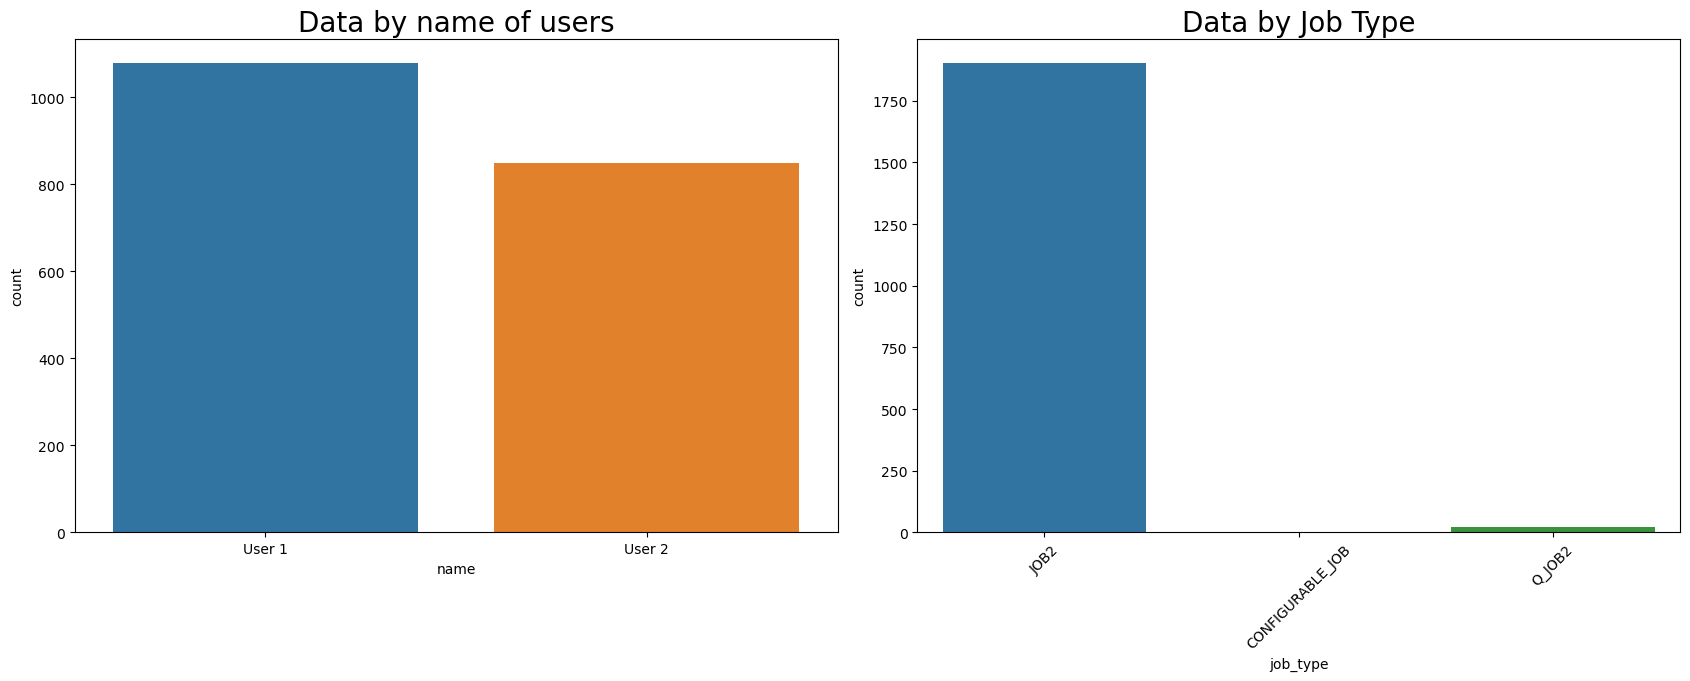

In [17]:
# To check if the data sample is equal in all groups i.e, users and job_type

plt.figure(figsize=(17,12))

# By name
plt.subplot(2,2,1)
sns.countplot(x='name', data=df, order=['User 1','User 2'])
plt.title('Data by name of users', fontsize=20)

# By job type
plt.subplot(2,2,2)
sns.countplot(x='job_type', data=df,)
plt.title('Data by Job Type', fontsize=20)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

From the above we see the data is not evenly distributed for the users and job types. User 1 and JOB2 have the highest counts of data.

In [18]:
# Summarizing the dataset through descriptive statistics to access the quality of the dataset
df.describe(include=['object'])

,name,user_id,job_type
count,1929,1929,1929
unique,2,2,3
top,User 1,#1000000002,JOB2
freq,1079,1079,1904


In [23]:
# examining descriptive statistics of the numeric variables in the dataset
df.describe(include=['float', 'int'])

,inactive_time,job_count,productivity,s_count,total_research_time,avg_research_time,total_review_time,avg_review_time
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000
mean,268.321180,50.403836,161.365474,0.000518,232.299249,18.401314,1230.037393,44.667115
std,2734.378768,48.260533,90.148400,0.022768,505.393558,92.260834,960.052502,96.424337
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,5.550000,5.550000
25%,3.447000,13.000000,96.000000,0.000000,4.707000,0.097000,444.326000,16.711000
50%,21.285000,36.000000,149.000000,0.000000,32.431000,0.730000,1054.110000,24.144000
75%,82.459000,74.000000,215.000000,0.000000,150.428000,3.306000,1858.813000,37.510000
max,94856.475000,272.000000,649.000000,1.000000,4121.343000,1456.398000,9891.122000,1525.609000


Discoveries:

Existence of unique values in each object columns.

User1 with a user_id #1000000002 and JOB2 accounts for majority cases in the dataset, representing 55.9% and 98.7% of the observations respectively.

Existence of outliers in almost all numeric columns. Point case, Avg Research Time; The interquatile range is between 0.097 until 3.306 however the maximum value is a 4 figure digits. The standard deviation is relatively high indicating the data is greately dispersed.

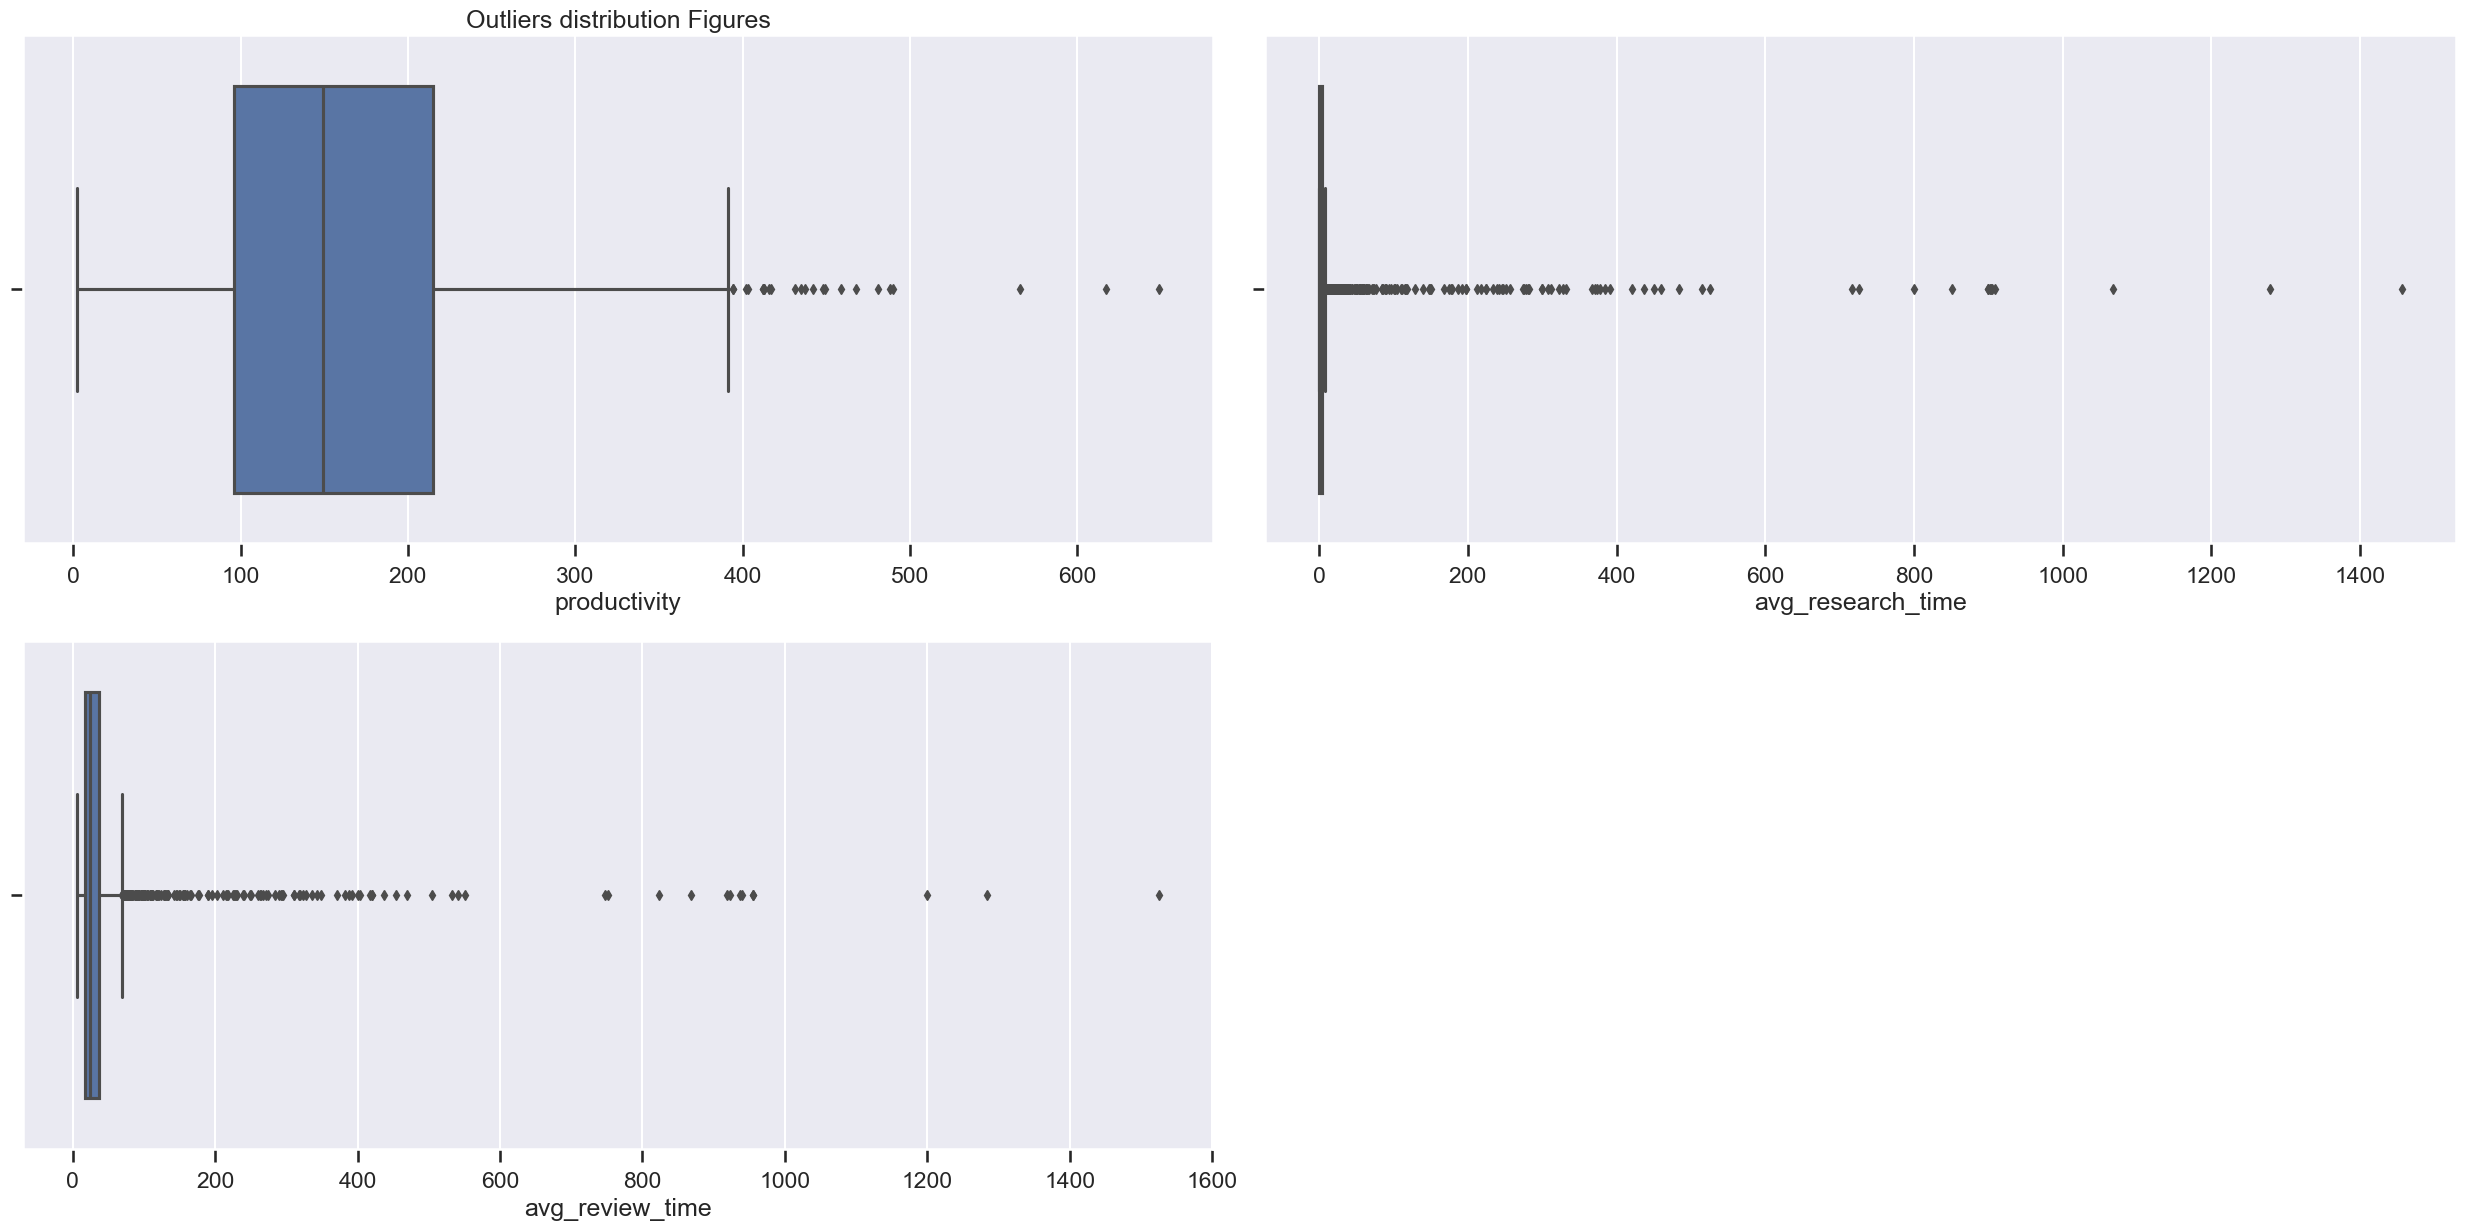

In [26]:
# plot to check for outliers
plt.style.use('seaborn')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (25, 18)

plt.subplot(3,2,1)
sns.boxplot(x= df['productivity'], data=df)
plt.title('Outliers distribution Figures')
plt.subplot(3,2,2)
sns.boxplot(x=df['avg_research_time'], data=df)

plt.subplot(3,2,3)
sns.boxplot(x=df['avg_review_time'], data=df)

plt.tight_layout()

plt.show()

#### Q1: How productivity varies between users by their assinged job type?

In [69]:
# Comparing users and job type with highest productivity 
df[['name', 'job_type',
      'productivity']].groupby(['name', 'job_type']).agg(sum).sort_values(by='productivity',\
                                                                             ascending=False)


,,productivity
name,job_type,
User 1,JOB2,188723
User 2,JOB2,117985
User 1,Q_JOB2,4476
User 2,CONFIGURABLE_JOB,90


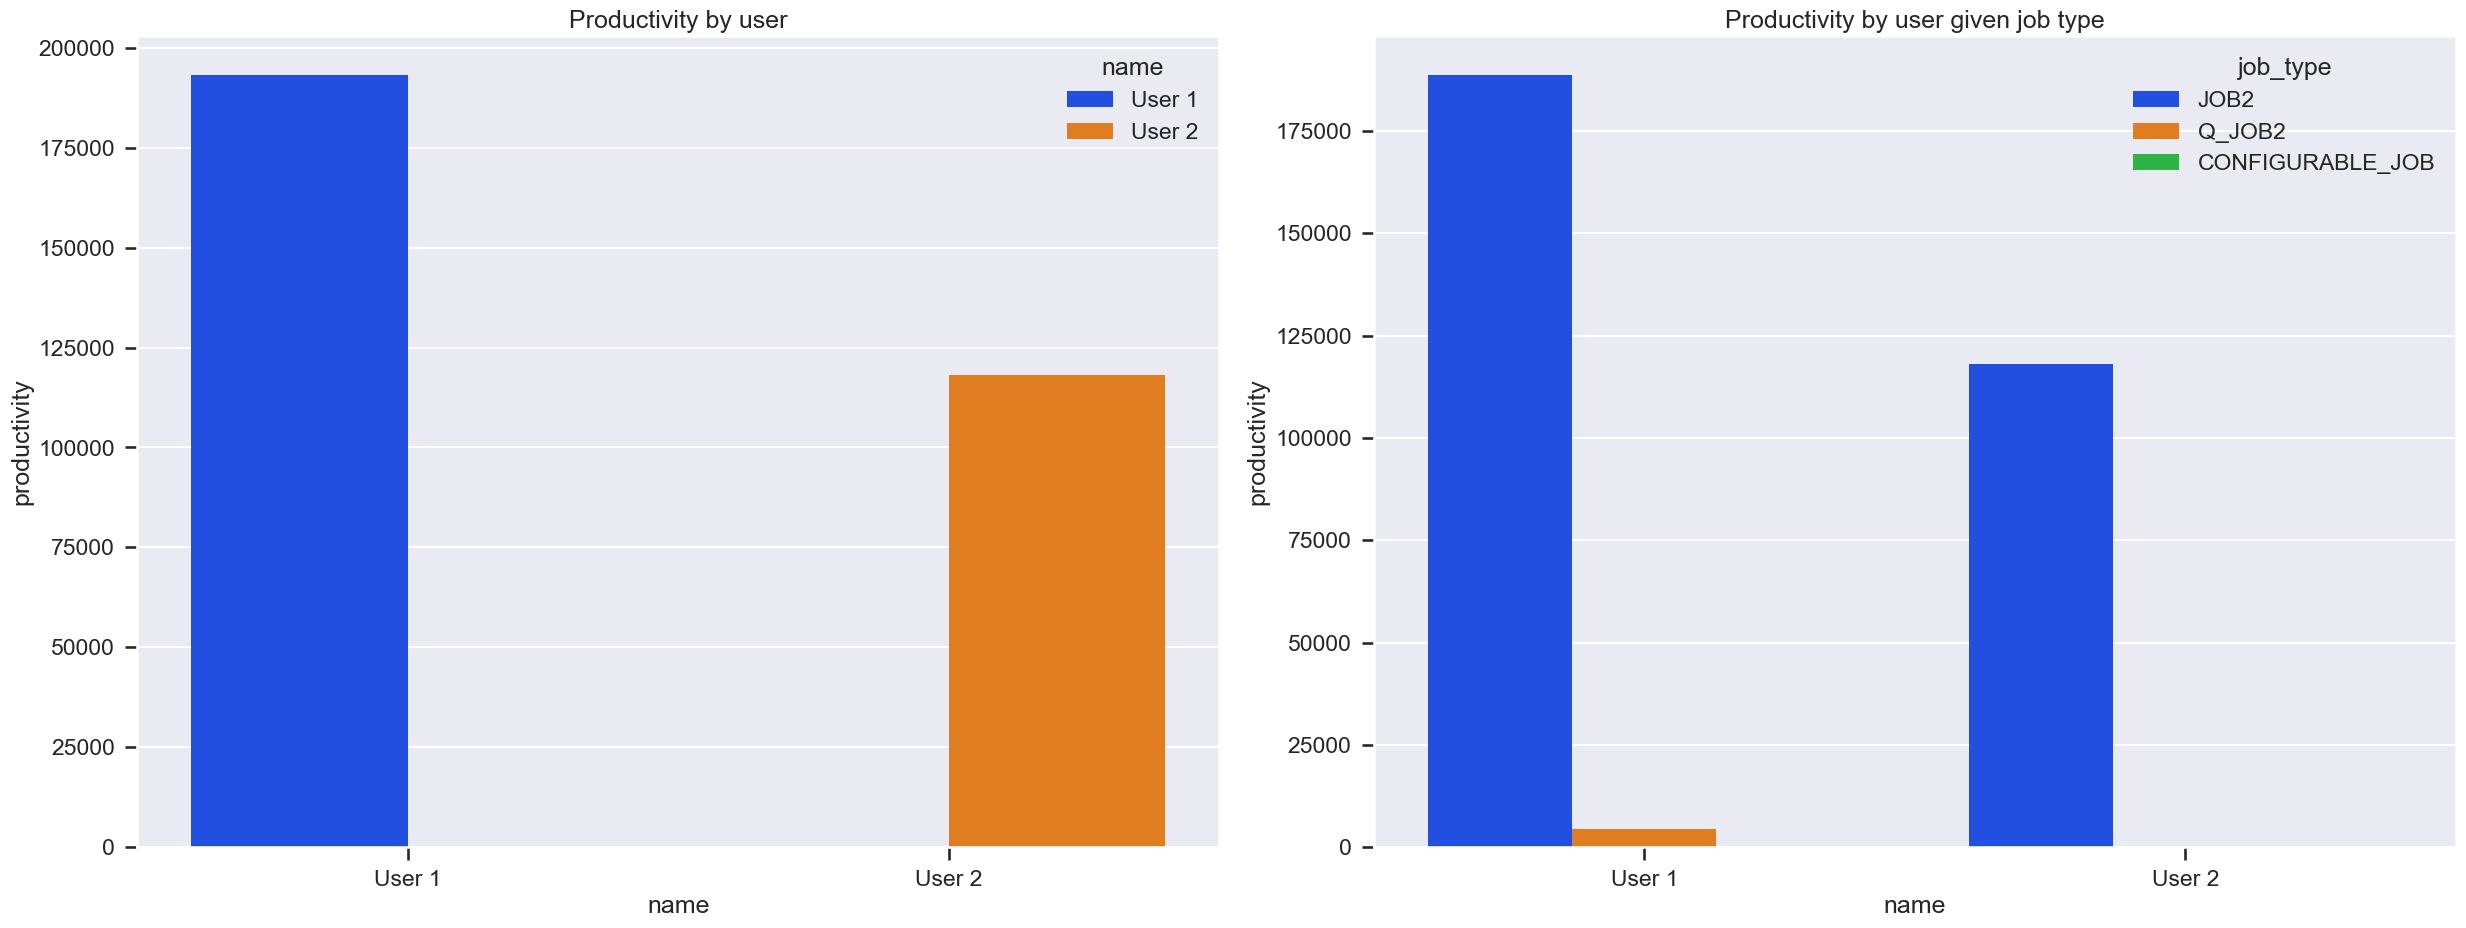

In [85]:
plt.style.use('seaborn')
sns.set_palette('bright')
#sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (25, 18)
sns.set_context('talk')

plt.subplot(2,2,1)
byuser = df.groupby('name').sum().reset_index()
sns.barplot(x = 'name', y = 'productivity', data = bygender, hue='name')
plt.title('Productivity by user')


plt.subplot(2,2,2)
byUserJobtype = df.groupby(['name','job_type']).sum().sort_values('productivity', ascending=False).reset_index()
plt.title('Productivity by user given job type' )
sns.barplot(x = 'name', y = 'productivity', hue = 'job_type', data = byUserJobtype, ci=None)


plt.tight_layout()
plt.show()

**Observations:**

User1 shows a higher overall productivity compared to user 2, while job type 'JOB2' records the highest total productivity across all users. User1 is more productive in Job type 'JOB2'in comparison to user2 for the same job type. Also, JOB2 is the common job type for both users.


#### Q2. How does productivity vary given the job count?

In [60]:
# Comparing the job count with the highest total productivity 
df[['job_count','productivity']].groupby(['job_count']).agg(sum).sort_values(by='productivity',\
                                                                             ascending=False).head(10)

,productivity
job_count,
1,14983
3,6661
5,6475
2,6052
9,5319
10,4795
4,4261
50,4040
39,3946


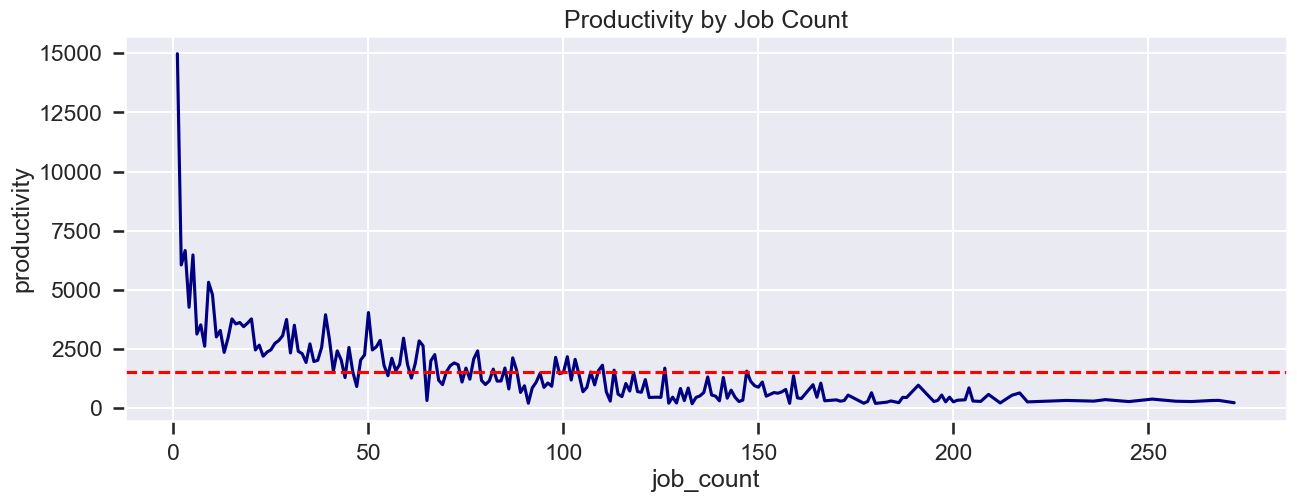

In [67]:
byJobCount = df[['job_count','productivity']].groupby(['job_count']).agg(sum).sort_values(by='productivity',\
                                                                             ascending=False)

plt.figure(figsize=(15,5))
sns.lineplot(x='job_count', y='productivity', data=byJobCount, color='navy')
plt.axhline(byJobCount['productivity'].mean(), ls='--', color='red')
plt.title('Productivity by Job Count')
#plt.xlim(0,800)
plt.show()

**Observations:**

The total productivity is decreasing as the number of jobs increase. The average total productivity is below 2500.

#### Q3. What is the trend of average research time & average review time by month over the years for both users collectively?

In [87]:
# grouping both user's average research time & average review time by months
df2= df.groupby(pd.Grouper(key='time_stamp',axis = 0,freq='M')).mean()[['avg_research_time','avg_review_time', 'productivity']]
df2

,avg_research_time,avg_review_time,productivity
time_stamp,,,
2021-08-31,9.676238,35.286036,200.903915
2021-09-30,10.484477,40.466536,138.797844
2021-10-31,21.208758,40.805624,191.473118
2021-11-30,21.681814,41.503541,206.790909
2021-12-31,36.127031,59.859521,144.800000
2022-01-31,13.088833,45.284874,134.761092
2022-02-28,11.957298,42.021793,139.686170


<Figure size 2500x800 with 0 Axes>

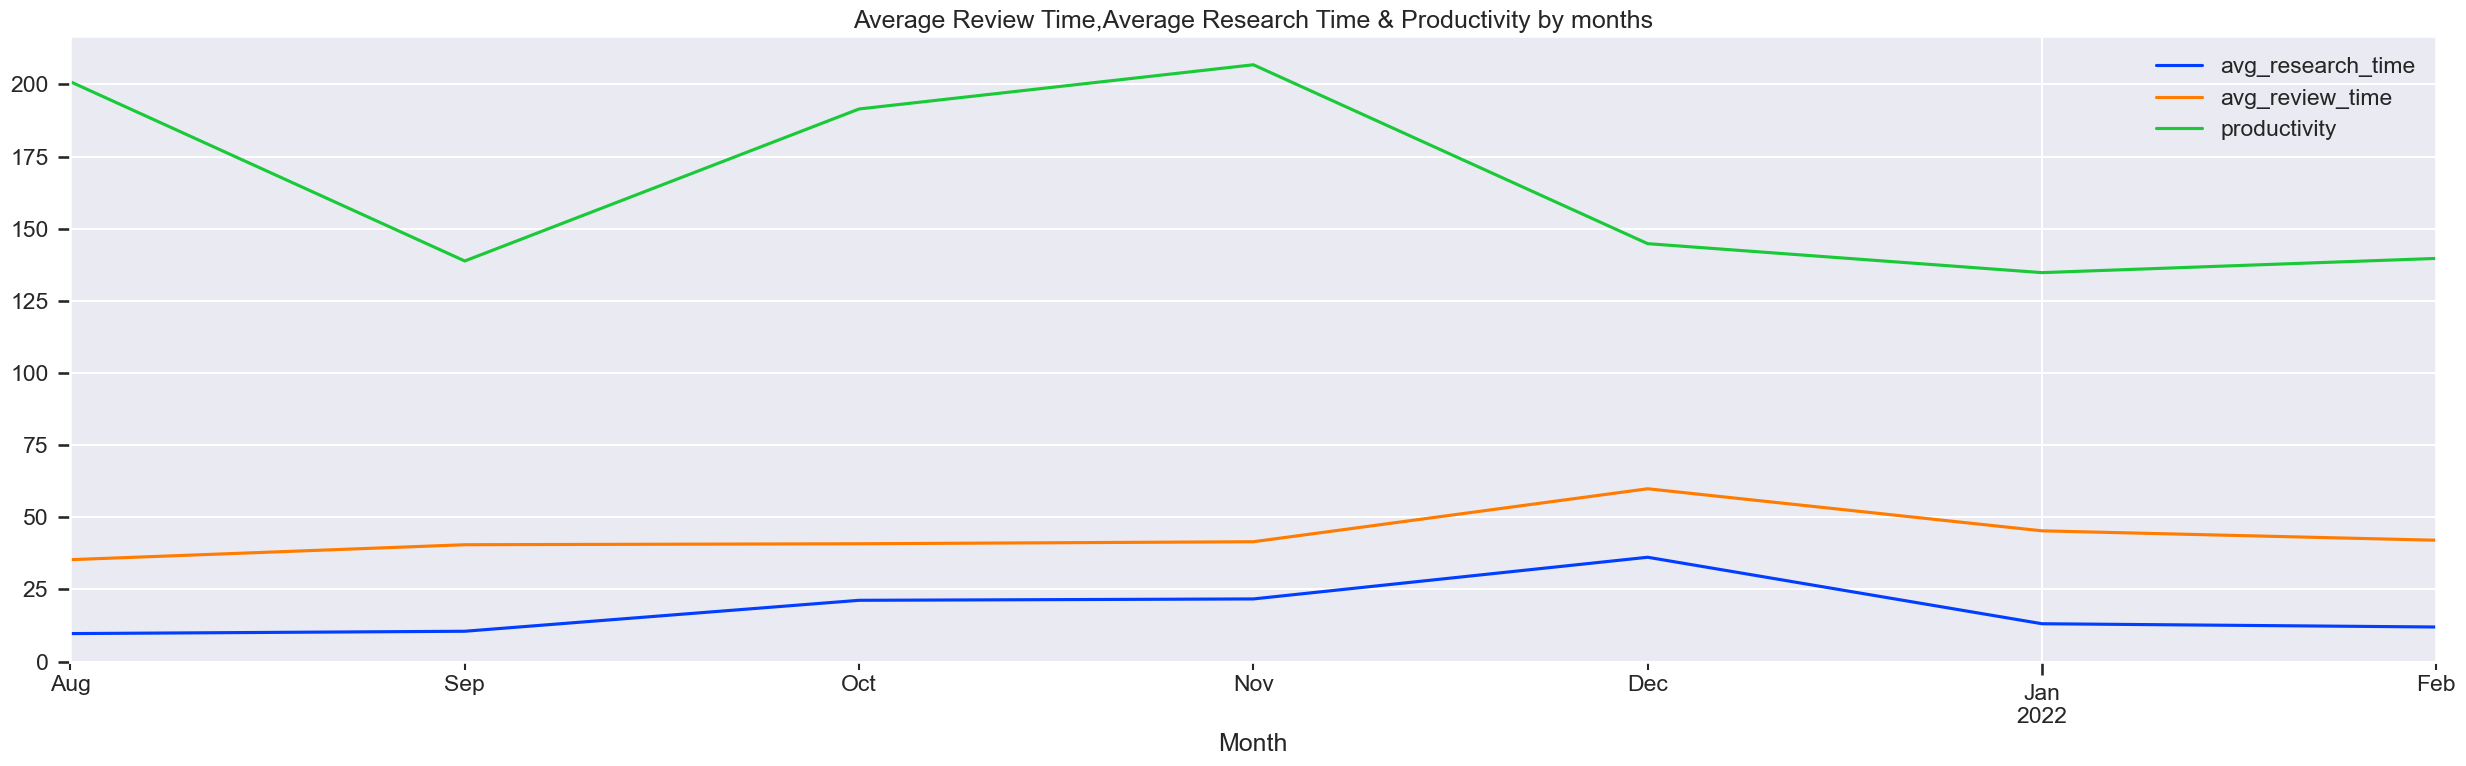

In [92]:
# ploting average research time & average review time by months
plt.figure(figsize=(25,8))
df2.plot(figsize=(25,8), title="Average Review Time,Average Research Time & Productivity by months", xlabel='Month')
plt.tight_layout()
plt.show()


#### Observations:

The highest productivity was observed in the month of November 2021 and the lowest record was seen in September the same year. From November there has been a sudden drop then thereafter a steady increased is observed in the beginning of 2022.

Productivity has been higher compared to average research and review times.

Overall trend shows that avg review time is higher compared to avg research time throughout the period of time.

Avg research time has a steady increase from August to September and reaching a plateau until November. There is a rapid increase reaching a peak in December followed by a sudden drop in the beginning of 2022. There has since been a steady decline until february of 2022.

Avg review time has also had a steady increase from the start up until September followed by a drastic climb in October of 2021. It then plateaued out for a month before a sudden increase in November reaching a peak in December. In the start of 2022 there is a drastic drop where it has since been declining steadily.